# Image Processing Shopee

## Import Libraries

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

from skimage import filters

## Open and show the image.

Turn the axis off 

(-0.5, 219.5, 219.5, -0.5)

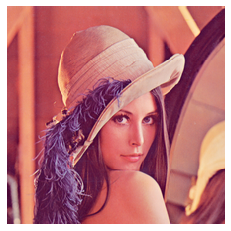

In [2]:
image = Image.open("lenna_test_image.png")
plt.imshow(image)
plt.axis("off")

## Show the image pixel rgb values

In [3]:
np.array(image)

array([[[225, 137, 127],
        [224, 137, 127],
        [227, 134, 119],
        ...,
        [227, 141, 128],
        [232, 150, 124],
        [213, 120, 104]],

       [[225, 137, 127],
        [224, 136, 127],
        [227, 134, 119],
        ...,
        [230, 144, 130],
        [238, 155, 126],
        [219, 124, 105]],

       [[227, 137, 122],
        [224, 134, 118],
        [228, 133, 117],
        ...,
        [209, 113, 106],
        [189,  97,  96],
        [149,  61,  80]],

       ...,

       [[ 90,  28,  60],
        [ 95,  29,  61],
        [ 97,  28,  63],
        ...,
        [126,  42,  68],
        [148,  58,  73],
        [158,  59,  73]],

       [[ 87,  24,  61],
        [ 92,  27,  62],
        [ 95,  25,  61],
        ...,
        [143,  58,  78],
        [167,  67,  80],
        [169,  65,  78]],

       [[ 84,  22,  58],
        [ 95,  29,  62],
        [ 93,  24,  59],
        ...,
        [159,  67,  84],
        [176,  70,  81],
        [182,  71,  80]]

## Check image format and size

In [4]:
print("Format: ", image.format)
print("Size: ", image.size)
print("Mode: ", image.mode)

Format:  PNG
Size:  (220, 220)
Mode:  RGB


## You can alter the alpha values (transparency) of the image:

(-0.5, 219.5, 219.5, -0.5)

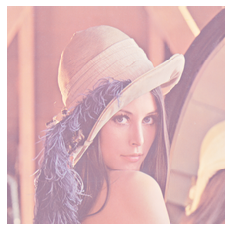

In [8]:
plt.imshow(image, alpha=0.5)
plt.savefig("lenna_with_alpha.png")
plt.axis("off")

In [9]:
image_a = Image.open("lenna_with_alpha.png")
print("Format: ", image_a.format)
print("Size: ", image_a.size)
print("Mode: ", image_a.mode)

Format:  PNG
Size:  (432, 288)
Mode:  RGBA


# Operations we can use with the image:

## Invert Image Color

(-0.5, 219.5, 219.5, -0.5)

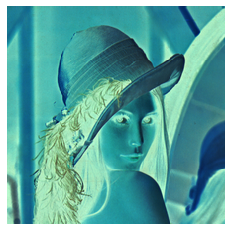

In [16]:
image_inverted = image.copy()
# Access all of the RGB values across the entire image
# Make a for loop to retrieve rgb values in all columns across all rows
for col in range(image_inverted.width):
    for row in range(image_inverted.height):
        coords = (col, row)
        pixel = image_inverted.getpixel(coords)
        
        # if red == 255, invert_red == 0:
        # if red == 254, invert_red == 1:
        
        inverted_colors = ()
        for color in pixel:
            inverted_colors += (255 - color,)
        
        image_inverted.putpixel(coords, inverted_colors)
plt.imshow(image_inverted)
plt.axis('off')

## Black and White

(-0.5, 219.5, 219.5, -0.5)

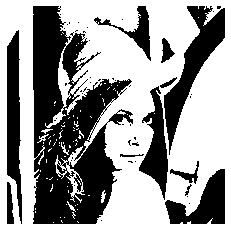

In [17]:
image_bw = image.copy()
# Access all of the RGB values across the entire image
# Make a for loop to retrieve rgb values in all columns across all rows
for col in range(image_bw.width):
    for row in range(image_bw.height):
        coords = (col, row)
        pixel = image_bw.getpixel(coords)
        
        ave = sum(pixel) / 3
        if ave < 128:
            ave = 0
        else:
            ave = 255
        
        image_bw.putpixel(coords, ((ave, )*3))
plt.imshow(image_bw)
plt.axis('off')

## Grayscale

(-0.5, 219.5, 219.5, -0.5)

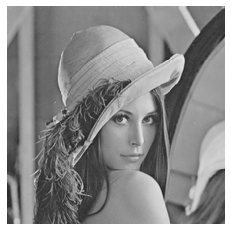

In [20]:
image_grayscale = image.copy()
# Access all of the RGB values across the entire image
# Make a for loop to retrieve rgb values in all columns across all rows
for col in range(image_grayscale.width):
    for row in range(image_grayscale.height):
        coords = (col, row)
        pixel = image_grayscale.getpixel(coords)
        
        ave = sum(pixel) // 3
        
        # IMPORTANT! Pixels cannot contain FLOAT / DOUBLE data types!
        image_grayscale.putpixel(coords, ((ave, )*3))
plt.imshow(image_grayscale)
plt.axis('off')

## Image Mirroring

### Vertical Flip

(-0.5, 219.5, 219.5, -0.5)

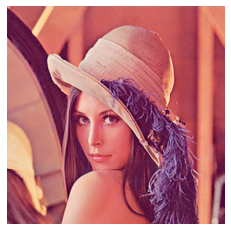

In [24]:
image_mirrored = image.copy()
# Access all of the RGB values across the entire image
# Make a for loop to retrieve rgb values in all columns across all rows
for col in range(image_mirrored.width):
    for row in range(image_mirrored.height):
        coords = (col, row)
        
        # To avoid the list index going out of range, add a -1 since width
        # does not respect index values :///
        mirror = (image_mirrored.width - col - 1, row)
        
        # The image pixels should be extracted from the original image.
        # Referencing from the image_mirrored will produce a half baked
        # vertical flipped image.
        pixel = image.getpixel(mirror)
        
        # IMPORTANT! Pixels cannot contain FLOAT / DOUBLE data types!
        image_mirrored.putpixel(coords, pixel)
plt.imshow(image_mirrored)
plt.axis('off')

## Horizontal Flip

(-0.5, 219.5, 219.5, -0.5)

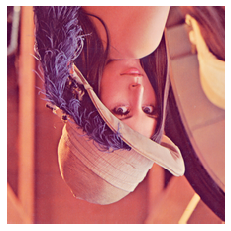

In [26]:
image_horizontal_flip = image.copy()
# Access all of the RGB values across the entire image
# Make a for loop to retrieve rgb values in all columns across all rows
for col in range(image_horizontal_flip.width):
    for row in range(image_horizontal_flip.height):
        coords = (col, row)
        
        # To avoid the list index going out of range, add a -1 since width
        # does not respect index values :///
        flip = (col, image_horizontal_flip.height - row - 1)
        
        # The image pixels should be extracted from the original image.
        # Referencing from the image_mirrored will produce a half baked
        # vertical flipped image.
        pixel = image.getpixel(flip)
        
        # IMPORTANT! Pixels cannot contain FLOAT / DOUBLE data types!
        image_horizontal_flip.putpixel(coords, pixel)
plt.imshow(image_horizontal_flip)
plt.axis('off')

## Contrast

### Intensify Contrast

(-0.5, 219.5, 219.5, -0.5)

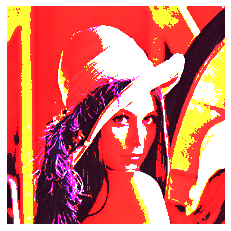

In [27]:
image_contrast = image.copy()
# Access all of the RGB values across the entire image
# Make a for loop to retrieve rgb values in all columns across all rows
for col in range(image_contrast.width):
    for row in range(image_contrast.height):
        coords = (col, row)
        pixel = image.getpixel(coords)
        
        contrast = ()
        for color in pixel:
            if color < 128:
                color = color // 2
            else:
                color = color * 2
                
                if color > 255:
                    color = 255
            contrast += (color,)
        contrast += (pixel[-1],)
        
        image_contrast.putpixel(coords, contrast)
plt.imshow(image_contrast)
plt.axis('off')

## Image Detection

In [32]:
from skimage import io, feature
from skimage.color import rgb2gray

image_skimage = rgb2gray(io.imread("lenna_test_image.png"))

In [33]:
image_skimage

array([[0.60776078, 0.60692745, 0.59874902, ..., 0.62093216, 0.64921725,
        0.54356431],
       [0.60776078, 0.60412196, 0.59874902, ..., 0.63241412, 0.6688102 ,
        0.56006902],
       [0.60801373, 0.59596627, 0.59621137, ..., 0.52115804, 0.45677608,
        0.31792118],
       ...,
       [0.17051843, 0.17777333, 0.1772    , ..., 0.24205725, 0.30669216,
        0.31783098],
       [0.15707922, 0.1699451 , 0.16655137, ..., 0.30393922, 0.34975412,
        0.34524431],
       [0.14812   , 0.17805608, 0.16151373, ..., 0.34421843, 0.36595333,
        0.37347608]])

## Canny Algorithm

You can use this for image segmentation and image classification

This is used to identify object edges

(-0.5, 219.5, 219.5, -0.5)

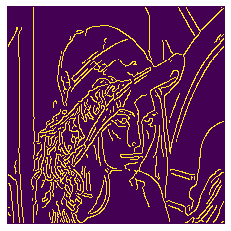

In [34]:
edge_canny = feature.canny(image_skimage)
plt.imshow(edge_canny)
plt.axis("off")

# Filters

## Prewitt
Used for smooth edges

In [ ]:
edge_prewitt = feature.canny(image_skimage)
plt.imshow(edge_pre)
plt.axis("off")